# How to make a submission to the Tabular Playground Series (Aug 2022) Using TensorFlow Decision Forests

**How to use this notebook**:
 - Click on the "copy & edit" button in the top right corner. Run the code cells from top to bottom and save a new version.
 - Read through and understand both the markdown cells as well as the code cells and their outputs.
 - Make a submission to the [Tabular Playground Series](https://www.kaggle.com/competitions/tabular-playground-series-aug-2022) competition. Experiment and try to increase your score (model selection, hyperparameter choices, feature engineering, feature selection, etc)


# Introduction

The goal of this notebook is to help Kagglers to: (1) better understand decision forest algorithms; (2) become familiar with the [TensorFlow Decision Forests (TF-DF)](https://www.tensorflow.org/decision_forests) Python API for executing decision forest algorithms; and (3) use decision forest algorithms to make submissions to the [August 2022 Tabular Playground Series](https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/data) Kaggle competition.

We'll be using [TensorFlow Decision Forests](https://www.tensorflow.org/decision_forests) (TF-DF) to train our model.  TensorFlow Decision Forests is a TensorFlow wrapper for the [Yggdrasil Decision Forests C++ libraries](https://github.com/google/yggdrasil-decision-forests).  TF-DF makes it very easy to train, serve and interpret various Decision Forest models such as [RandomForests](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel) and [GrandientBoostedTrees](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/GradientBoostedTreesModel).  These types of decision forest models require minimal pre-processing of the data and are great when working with tabular datasets and/or small datasets (especially if you just want a quick baseline result to compare against).

[Decision Forests ](https://www.tensorflow.org/decision_forests)are a category of supervised machine learning methods that can be used for classification, regression and ranking. When thinking about decision forests, it can be helpful to first think about decision trees. Multiple decision trees can be "[ensembled](https://scikit-learn.org/stable/modules/ensemble.html#)" or analyzed together in order to form a "decision forest" which then should have improved predictive capabilities as compared to each individual tree.  The most popular decision forest methods are the [RandomForest](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf) and [GradientBoostedTrees](https://jerryfriedman.su.domains/ftp/trebst.pdf) algorithms.  These algorithms are conceptually very similar to each other but anecdotally I often find that gradient boosted models have superior performance.
* You can learn more about decision tree models and ensemble methods (such as RandomForest and GradientBoostedTrees) on scikit-learn's [decision tree](https://scikit-learn.org/stable/modules/tree.html#tree) and [ensemble](https://scikit-learn.org/stable/modules/ensemble.html#) pages. Some very nice implementationss of random forest algorithms can be found in popular Python packages such as [TF-DF](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel),  [scikit-learn](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees), and [xgboost](https://xgboost.readthedocs.io/en/latest/tutorials/rf.html?highlight=random%20forest#random-forests-tm-in-xgboost).  Likewise, you can find great gradient boosted trees algorithms in [TF-DF](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/GradientBoostedTreesModel),  [scikit-learn](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting), and [xgboost](https://xgboost.readthedocs.io/en/latest/tutorials/model.html#introduction-to-boosted-trees).  For an explanation on the differences between random forest models and gradient boosted models, see [here](https://xgboost.readthedocs.io/en/latest/R-package/discoverYourData.html?highlight=random%20forest#special-note-what-about-random-forests) and [here](https://xgboost.readthedocs.io/en/latest/tutorials/rf.html?highlight=random%20forest#random-forests-tm-in-xgboosthttps://xgboost.readthedocs.io/en/latest/tutorials/rf.html?highlight=random%20forest#random-forests-tm-in-xgboost).  
* For hands-on experience with these same concepts consider completing Kaggle Learn's [Intro to machine learning](https://www.kaggle.com/learn/intro-to-machine-learning) and [Intermediate machine learning](https://www.kaggle.com/learn/intermediate-machine-learning%5C) courses.




We'll be working with the [Tabular Playground Series August 2022](https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/data) Kaggle Dataset.  It is a tabular dataset with ~26,000 rows and 26 columns (3.95MB .CSV training dataset + 3.06MB .CSV test set) that is suitable for training algorithms to solve binary classification problems (in this case to determine if a "Super Soaker" machine is in a "failure" state of "0" or "1" based off of input sensor data (consisting of 18 measurement fields, 4 attribute fields, and 2 additional fields)).  

Submissions will be [evaluated](https://admin.kaggle.com/competitions/tabular-playground-series-aug-2022/overview/evaluation) according to the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target. This is a useful metric that takes into consideration the rate of both false positive predictions and true positive predictions. These types of metrics are important to use when you are working with highly imbalanced datasets and tasks such as trying to detect rare failure cases.  For example, if only 1% of cases are failures, then a naive algorithm could get a 99% accuracy score by never predicting a failure for even a single case. To avoid these types of issues we are using the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) evaluation metric in order to better assess the performance of our model. 
* You can learn more about false positive rates, ROC curves, and similar concepts such as precision and recall here: [false positive rates](https://en.wikipedia.org/wiki/False_positives_and_false_negatives), [ROC curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic), [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall).
* For hands-on experience with these same concepts we recommend completing Kaggle Learn's [Intro to machine learning](https://www.kaggle.com/learn/intro-to-machine-learning) and [Intermediate machine learning](https://www.kaggle.com/learn/intermediate-machine-learning%5C) courses.

By studying this tutorial you will learn how to use [TF-DF](https://www.tensorflow.org/decision_forests) to quickly train a [GradientBoostedTrees](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/GradientBoostedTreesModel) model to perform a binary classification task using tabular data, in order to make a submission to the [August 2022 Tabular Playground Series competition](https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/) on Kaggle.

Step 1: Import Python packages

In [1]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 32.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6

In [2]:
# Import Python packages
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from pandas_profiling import ProfileReport
print("TensorFlow Decision Forests v" + tfdf.__version__)
%matplotlib inline

TensorFlow Decision Forests v0.2.7


In [3]:
# Define helper functions:  
# One for plotting training evaluation curves, and another for expanding feature number 27.
# This bit of code is not particularly important with regards to learning how to use TensorFlow Decision Forests (TF-DF)
# If you are just trying to learn how to use TF-DF then my recommendation would be to skip this code cell and instead focus on understanding all the rest

def plot_tfdf_model_training_curves(model):
    # This function was adapted from the following tutorial:
    # https://www.tensorflow.org/decision_forests/tutorials/beginner_colab
    logs = model.make_inspector().training_logs()
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    # Plot accuracy vs number of trees
    plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy (out-of-bag)")
    plt.subplot(1, 2, 2)
    # Plot loss vs number of trees
    plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
    plt.xlabel("Number of trees")
    plt.ylabel("Logloss (out-of-bag)")
    plt.show()
    
    
pd.set_option('display.max_columns', None)

Step 2: Identify the location of the data

In [4]:
# print list of all data and files attached to this notebook
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2022/train.csv
/kaggle/input/tabular-playground-series-aug-2022/test.csv


Step 3: Load the data

In [5]:
# load to pandas dataframe (for data exploration)
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/train.csv').drop('id', axis=1)
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/test.csv').drop('id', axis=1)

# load to tensorflow dataset (for model training)
train_tfds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="failure")
test_tfds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

/opt/conda/lib/python3.7/site-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


Step 4: Explore the data

In [6]:
# print column names
print(train_df.columns)
print(train_df.shape)

Index(['product_code', 'loading', 'attribute_0', 'attribute_1', 'attribute_2',
       'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2',
       'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6',
       'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10',
       'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14',
       'measurement_15', 'measurement_16', 'measurement_17', 'failure'],
      dtype='object')
(26570, 25)


It is a tabular dataset with ~26,000 rows and 25 columns (3.95MB .CSV training dataset + 3.06MB .CSV test set) suitable for training algorithms to solve binary classification problems (in this case to determine if a "Super Soaker" machine is in a "failure" state of "0" or "1" based off of input sensor data (consisting of 18 measurement fields, 4 attribute fields, and 2 additional fields)).  

In [7]:
# print basic summary statistics
train_df.describe().head(3)
# For additional summary statistics you can run the following few lines as well:
# from pandas_profiling import ProfileReport
# # train_profile = ProfileReport(train_df, title="August 2022 Tabular Data Series")
# # train_profile

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,25633.000000,25522.000000,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,11.716624,19.024714,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,1.000836,1.008591,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160


In [8]:
train_df['failure'].value_counts()

0    20921
1     5649
Name: failure, dtype: int64

It looks like we have ~5k failure measurements and ~21k normal measurements.  

In [9]:
# preview first few rows of data
train_df.head(10)

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
5,A,75.35,material_7,material_8,9,5,11,4,0,17.564,13.721,16.594,NaN,11.592,20.810,10.622,14.904,19.107,13.327,15.354,19.251,NaN,17.625,832.902,0
6,A,161.71,material_7,material_8,9,5,12,2,4,17.303,12.643,17.476,17.679,12.957,17.916,11.370,17.714,19.924,11.560,16.653,17.734,NaN,16.637,684.438,1
7,A,177.92,material_7,material_8,9,5,4,8,8,17.062,13.634,17.879,15.894,11.029,18.643,10.254,16.449,20.478,12.207,15.624,16.968,15.176,17.231,684.000,1
8,A,109.50,material_7,material_8,9,5,9,6,5,18.111,11.886,17.354,18.558,11.540,19.887,11.557,15.965,19.604,14.091,15.674,13.327,13.535,15.408,NaN,0
9,A,98.72,material_7,material_8,9,5,10,4,7,18.945,12.249,17.298,18.482,11.298,19.011,10.384,15.237,18.427,12.635,14.318,14.327,12.867,NaN,NaN,0


<AxesSubplot:>

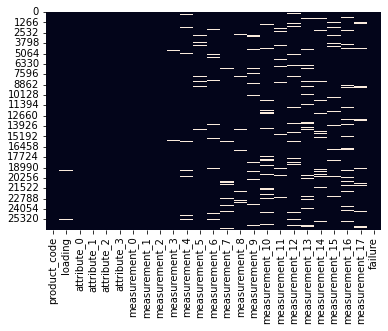

In [10]:
# check for missing values
sns.heatmap(train_df.isnull(), cbar=False)

RandomForest and GradientBoostedTrees deal with null values automatically but for improved model performance we might consider handling these missing values in a more thoughtful way.  To learn more about data imputation techniques, consider reviewing the relevant Kaggle Learn exercise [here](https://www.kaggle.com/code/alexisbcook/missing-values).

Step 5: Feature Engineering and Feature Selection

In [11]:
#  ADD CONTENT HERE TO IMPROVE YOUR SCORE!

To get to the top of the leaderboard it will be important to do a lot of clever feature engineering and feature selection. You can learn more about these concepts by reviewing the relevant Kaggle Learn exercise [here]((https://www.kaggle.com/learn/feature-engineering)). These steps were intentionally skipped in this tutorial for the sake of brevity.

# RandomForest

Next we will take our training data and we will use it to train a Random Forest model (to predict whether a given piece of machinery is in a state of "0" or "1").

Step 6: Train a [Random Forest](https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf) Model



> "A Random Forest is a collection of deep CART decision trees trained independently and without pruning. Each tree is trained on a random subset of the original training dataset (sampled with replacement).
> 
> The algorithm is unique in that it is robust to overfitting, even in extreme cases e.g. when there is more features than training examples.
> 
> It is probably the most well-known of the Decision Forest training algorithms"




 ~ Quoted from [TFDF RandomForest documentation ](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel)

One neat thing about TF-DF is that in addition to having a default set of hyper-parameters, you are also provided with a list of additional hyper-parameter choices to consider.  This makes it a lot easier to optimize model performance because you do not have to do this expensive hyper-parameter optimization step all by yourself.

In [12]:
print(tfdf.keras.RandomForestModel.predefined_hyperparameters())

[HyperParameterTemplate(name='better_default', version=1, parameters={'winner_take_all': True}, description='A configuration that is generally better than the default parameters without being more expensive.'), HyperParameterTemplate(name='benchmark_rank1', version=1, parameters={'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}, description='Top ranking hyper-parameters on our benchmark slightly modified to run in reasonable time.')]


In [13]:
# Train the model
rf_model = tfdf.keras.RandomForestModel(hyperparameter_template="better_default",num_trees=5)
rf_model.compile(metrics=[tf.keras.metrics.AUC(curve="ROC")]) 
rf_model.fit(x=train_tfds)

Resolve hyper-parameter template "better_default" to "better_default@v1" -> {'winner_take_all': True}.
Use /tmp/tmp76js4kuj as temporary training directory
Reading training dataset...
Training dataset read in 0:00:04.744396. Found 26570 examples.
Training model...
Model trained in 0:00:00.484644
Compiling model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmp76js4kuj/model/ with prefix a9526a19815e45e5
[INFO abstract_model.cc:1248] Engine "RandomForestOptPred" built
[INFO kernel.cc:1022] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [14]:
# Visualize the model
# Currently this step works in the Kaggle Notebook Editor but unfortunately displays an empty/blank visualization in the Notebook Viewer
tfdf.model_plotter.plot_model_in_colab(rf_model, tree_idx=0, max_depth=3)

Step 7: Evaluate your Random Forest Model

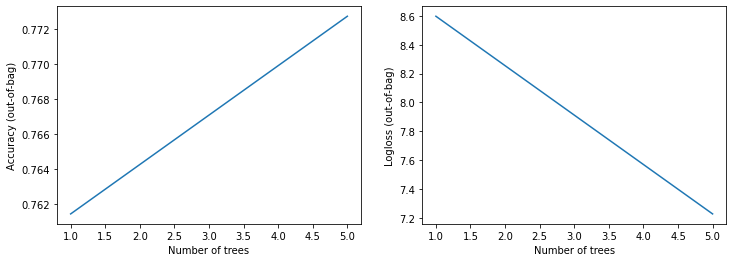

In [15]:
plot_tfdf_model_training_curves(rf_model)

In [16]:
inspector = rf_model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=23872, accuracy=0.7727463136729222, loss=7.226018259719378, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [17]:
rf_model.evaluate(train_tfds)

27/27 [==============================] - 2s 29ms/step - loss: 0.0000e+00 - auc: 0.7408


[0.0, 0.7408074140548706]

In [18]:
print("Model type:", inspector.model_type())
print("Objective:", inspector.objective())
print("Evaluation:", inspector.evaluation())

Model type: RANDOM_FOREST
Objective: Classification(label=__LABEL, class=None, num_classes=2)
Evaluation: Evaluation(num_examples=23872, accuracy=0.7727463136729222, loss=7.226018259719378, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)


77% accuracy and 0.74 AUC-ROC is not a bad baseline result given how few lines of code were required to get that result.  To get to the top of the leaderboard it will be important to do add in a few additional code cells where and spend some time doing some feature engineering and feature selection (these steps were intentionally skipped in this tutorial for the sake of brevity). You can learn more about these concepts by reviewing the relevant Kaggle Learn exercise [here]((https://www.kaggle.com/learn/feature-engineering)).

Step 8: Investigate variable importances for the RandomForest model


Variable importances (VI) describe the impact of each feature to the model.
 - > VIs generally indicates how much a variable contributes to the model predictions or quality. Different VIs have different semantics and are generally not comparable.
 - > The VIs returned by variable_importances() depends on the learning algorithm and its hyper-parameters. For example, the hyperparameter compute_oob_variable_importances=True of the Random Forest learner enables the computation of permutation out-of-bag variable importances.
 - > Variable importances can be obtained with tfdf.inspector.make_inspector(path).variable_importances().

The available variable importances are:
 - > Model agnostic
  - > MEAN_{INCREASE,DECREASE}_IN_{metric}: Estimated metric change from removing a feature using permutation importance . Depending on the learning algorithm and hyper-parameters, the VIs can be computed with validation, cross-validation or out-of-bag. For example, the MEAN_DECREASE_IN_ACCURACY of a feature is the drop in accuracy (the larger, the most important the feature) caused by shuffling the values of a features. For example, MEAN_DECREASE_IN_AUC_3_VS_OTHERS is the expected drop in AUC when comparing the label class "3" to the others.
 - > Decision Forests specific
  - > SUM_SCORE: Sum of the split scores using a specific feature. The larger, the most important.
  - > NUM_AS_ROOT: Number of root nodes using a specific feature. The larger, the most important.
  - > NUM_NODES: Number of nodes using a specific feature. The larger, the most important.
  - > MEAN_MIN_DEPTH: Average minimum depth of the first occurence of a feature across all the tree paths. The smaller, the most important.
  

~ Quoted from [TensorFlow Decision Forests](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/inspector/AbstractInspector#variable_importances) documentation and [yggdrasil-decision-forests](https://github.com/google/yggdrasil-decision-forests/blob/main/documentation/user_manual.md#variable-importances) documentation.


In [19]:
# Adapted from https://www.tensorflow.org/decision_forests/tutorials/advanced_colab
# See list of inspector methods from:
# [field for field in dir(inspector) if not field.startswith("_")]
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 SUM_SCORE
	 MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 NUM_NODES


Variable importances describe how each feature impacts the model.

In [20]:
inspector.variable_importances()["SUM_SCORE"]

[("loading" (1; #4), 2072.7757608818356),
 ("measurement_4" (1; #17), 1094.722292935301),
 ("measurement_12" (1; #9), 1087.160953161394),
 ("measurement_17" (1; #14), 1064.7174628162174),
 ("measurement_8" (1; #21), 1049.731318154605),
 ("measurement_9" (1; #22), 1034.330689098977),
 ("measurement_7" (1; #20), 1015.8007610648638),
 ("measurement_5" (1; #18), 1015.3928160857758),
 ("measurement_14" (1; #11), 1014.0916573925642),
 ("measurement_15" (1; #12), 999.2392714523012),
 ("measurement_6" (1; #19), 978.4510788015323),
 ("measurement_3" (1; #16), 969.4374444499263),
 ("measurement_10" (1; #7), 931.1798158658785),
 ("measurement_13" (1; #10), 925.5084871658473),
 ("measurement_16" (1; #13), 906.2425026113633),
 ("measurement_11" (1; #8), 892.262577046873),
 ("measurement_0" (1; #5), 550.0289282731828),
 ("measurement_1" (1; #6), 498.98054228164256),
 ("measurement_2" (1; #15), 459.3540888214484),
 ("product_code" (4; #23), 433.0003415090032),
 ("attribute_1" (4; #1), 163.86844906397

Here we can see that our model thinks that the most important feature is the status of the "loading" column.

Using the RandomForest model we were able to achieve 77% accuracy and 0.74 AUC-ROC. This isn't necessarily a great result.  To get to the top of the leaderboard it will be important to do add in a few additional code cells where and spend some time doing some feature engineering and feature selection (as mentioned previously).  In the meantime, let's evaluate if simply swapping out the RandomForest for a GradientBoostedTrees model is enough to improve our result.

# GradientBoostedTrees

Next we will take our training data and we will use it to train a Gradient Boosted model (to predict whether a given piece of machinery is in a state of "0" or "1").

Step 9: Train a [GradientBoostedTrees](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf) model.  GradientBoostedTrees often perform better than the RandomForests we were using previously.



> "A GBT (Gradient Boosted Tree) is a set of shallow decision trees trained sequentially. Each tree is trained to predict and then "correct" for the errors of the previously trained trees (more precisely each tree predict the gradient of the loss relative to the model output)"



 ~ Quoted from [TFDF GradientBoostedTrees documentation ](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/GradientBoostedTreesModel)


In [21]:
# As mentioned previously, TF-DF gives you lots of different "default" hyper-parameter settings to choose from.
print(tfdf.keras.GradientBoostedTreesModel.predefined_hyperparameters())

[HyperParameterTemplate(name='better_default', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL'}, description='A configuration that is generally better than the default parameters without being more expensive.'), HyperParameterTemplate(name='benchmark_rank1', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}, description='Top ranking hyper-parameters on our benchmark slightly modified to run in reasonable time.')]


In [22]:
# Train the model
gb_model = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template="benchmark_rank1@v1",num_trees=50,early_stopping='NONE')
gb_model.compile(metrics=[tf.keras.metrics.AUC(curve="ROC")])
gb_model.fit(x=train_tfds)

Resolve hyper-parameter template "benchmark_rank1@v1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpu_yishid as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.881669. Found 26570 examples.
Training model...
Model trained in 0:00:09.105140
Compiling model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpu_yishid/model/ with prefix 3ffa19a89ac54988
[INFO abstract_model.cc:1248] Engine "GradientBoostedTreesGeneric" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.


In [23]:
# Visualize the model
# Currently this step works in the Kaggle Notebook Editor but unfortunately displays an empty/blank visualization in the Notebook Viewer
tfdf.model_plotter.plot_model_in_colab(gb_model, tree_idx=0, max_depth=3)

Step 10: Evaluate your GradientBoostedTrees  Model

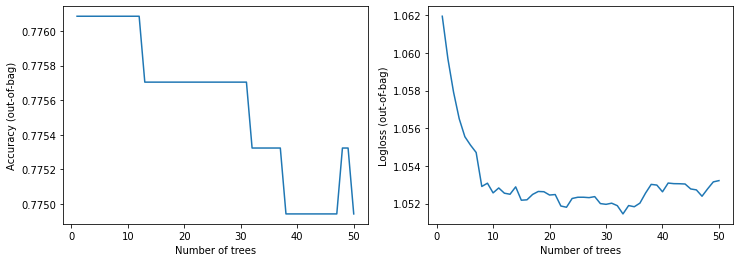

In [24]:
plot_tfdf_model_training_curves(gb_model)

In [25]:
inspector = gb_model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=None, accuracy=0.7749428749084473, loss=1.0532159805297852, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [26]:
gb_model.evaluate(train_tfds)

27/27 [==============================] - 1s 17ms/step - loss: 0.0000e+00 - auc_1: 0.7325


[0.0, 0.7324758172035217]

In [27]:
print("Model type:", inspector.model_type())
print("Objective:", inspector.objective())
print("Evaluation:", inspector.evaluation())

Model type: GRADIENT_BOOSTED_TREES
Objective: Classification(label=__LABEL, class=None, num_classes=2)
Evaluation: Evaluation(num_examples=None, accuracy=0.7749428749084473, loss=1.0532159805297852, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)


In [28]:
gb_model.evaluate(train_tfds)

27/27 [==============================] - 1s 17ms/step - loss: 0.0000e+00 - auc_1: 0.7325


[0.0, 0.7324758172035217]

77% accuracy and 0.74 AUC-ROC is not a bad baseline result given how few lines of code were required, but we'll still want to eventually do a bit more with the feature engineering and feature selection steps in order to improve this score a bit.

Step 10: Investigate variable importances for the GradientBoostedTrees model

As mentioned previously, variable importances describe how each feature impacts the model. Variable importances can tell you how much a given variable contributes to the model's predictions. 


In [29]:
# Adapted from https://www.tensorflow.org/decision_forests/tutorials/advanced_colab
# See list of inspector methods from:
# [field for field in dir(inspector) if not field.startswith("_")]
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 SUM_SCORE
	 MEAN_MIN_DEPTH
	 NUM_NODES
	 NUM_AS_ROOT


Variable importances describe how each feature impacts the model. Once again we can see that our most important features were the features that we created during our feature engineering step. 

In [30]:
inspector.variable_importances()["SUM_SCORE"]

[("loading" (1; #4), 559.8931110924095),
 ("attribute_2" (1; #2), 223.82331429147598),
 ("attribute_3" (1; #3), 184.93542752573194),
 ("measurement_0" (1; #5), 168.08433167122712),
 ("measurement_10" (1; #7), 140.2284309618226),
 ("measurement_11" (1; #8), 128.82926891868192),
 ("measurement_1" (1; #6), 107.41947426058323),
 ("measurement_12" (1; #9), 103.99421458661527),
 ("measurement_14" (1; #11), 103.68145539039324),
 ("measurement_13" (1; #10), 85.15817105813767),
 ("measurement_15" (1; #12), 80.79988142699221),
 ("measurement_17" (1; #14), 78.35514263315054),
 ("measurement_16" (1; #13), 75.8982260601988),
 ("measurement_5" (1; #18), 67.26811059656393),
 ("measurement_3" (1; #16), 57.33023495006273),
 ("measurement_2" (1; #15), 55.25039620930693),
 ("measurement_6" (1; #19), 51.57857351601342),
 ("measurement_4" (1; #17), 47.12805861150264),
 ("measurement_7" (1; #20), 42.1572431592067),
 ("measurement_9" (1; #22), 36.03003432597325),
 ("measurement_8" (1; #21), 21.43617520225234

Our GradientBoostedTrees algorithm found that the "loading" feature was the most informative, just like our RandomForest model did.  The GradientBoosted Trees algorithm also seems to be quite interested in "attribute_2" and "attribute_3" as well.  It would be interesting to dig into these in a bit more detail.

Using the GradientBoostedTrees model we were able to achieve 77% accuracy and 0.74 AUC-ROC. This isn't necessarily a great result.  To get to the top of the leaderboard it will be important to do add in a few additional code cells and spend some time doing some feature engineering and feature selection (as mentioned previously).  

In [31]:
# Visualize the model
# Currently this step works in the Kaggle Notebook Editor but unfortunately displays an empty/blank visualization in the Notebook Viewer
tfdf.model_plotter.plot_model_in_colab(gb_model, tree_idx=0, max_depth=3)

Step 11: Submit your results

In [32]:
# One submission file using RandomForest
sample_submission_df = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv')
sample_submission_df['failure'] = rf_model.predict(test_tfds)
sample_submission_df.to_csv('/kaggle/working/rf_submission.csv', index=False)
sample_submission_df.head()

# And another using GradientBoostedTrees 
sample_submission_df = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv')
sample_submission_df['failure'] = gb_model.predict(test_tfds)
sample_submission_df.to_csv('/kaggle/working/gb_submission.csv', index=False)
sample_submission_df.head()

21/21 [==============================] - 0s 16ms/step


,id,failure
0,26570,0.313065
1,26571,0.254558
2,26572,0.300084
3,26573,0.328222
4,26574,0.322489


TF-DF makes it very easy to find lots of useful information about your model.  For example, the following code cell provides a tremendous amount of information with just a single line of code.  You can preview the output of this code cell by clicking on the "show output" button below.

In [33]:
gb_model.summary()

Model: "gradient_boosted_trees_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (24):
	attribute_0
	attribute_1
	attribute_2
	attribute_3
	loading
	measurement_0
	measurement_1
	measurement_10
	measurement_11
	measurement_12
	measurement_13
	measurement_14
	measurement_15
	measurement_16
	measurement_17
	measurement_2
	measurement_3
	measurement_4
	measurement_5
	measurement_6
	measurement_7
	measurement_8
	measurement_9
	product_code

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.    "attribute_0"  5.377054 ################
    2.        "__LABEL"  5.377054 ################
    3.    "attribute_1"  5.375763 ###############
    4.   "product_code"  5.347018 ###############
    5.  

# Conclusion

[TensorFlow Decision Forests](https://www.tensorflow.org/decision_forests) (TF-DF) made it  quick and easy to train our RandomForest and GradientBoostedTrees models.  These types of decision forest models require minimal pre-processing of the data and are great when working with tabular datasets and/or small datasets (especially if you just want a quick baseline result to compare against).  Some of my favorite parts about  working with TF-DF were: (1) I was able to train a GradientBoostedTrees model with only a few lines of code; (2) there were lots of different default hyper-parameter options that I could choose from; (3) it was easy to visualize the structure/architecture of my models; and (4) it was easy to explore what features were most important to my model (to interpret and explain its decisions).


We worked with the [Tabular Playground Series August 2022](https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/data) Kaggle Dataset.  It was a tabular dataset with with 26,000 rows x 26 columns (3.95MB .CSV training dataset + 3.06MB .CSV test set) that was suitable for training algorithms to solve binary classification problems (in this case to determine if a "Super Soaker" machine is in a "failure" state of "0" or "1" based off of input sensor data (consisting of 18 measurement fields, 4 attribute fields, and 2 additional fields)).  


We were able to quickly solve this task with an accuracy of ~77% (AUC-ROC: ~.74). This isn't necessarily a great result but hopefully can serve as a helpful and informative baseline for the task at hand.  To get to the top of the leaderboard it will be important to do add in a few additional code cells where and spend some time doing some feature engineering and feature selection (as mentioned previously). 

To learn more about TF-DF visit https://www.tensorflow.org/decision_forests.

Next steps?
 - Click on the "copy & edit" button in the top right corner of this notebook
 - Experiment and try to increase the score.  My recommendation would be to focus on the [feature engineering and feature selection](https://www.kaggle.com/learn/feature-engineering) steps, as these steps were omitted from this tutorial (for the sake of brevity)
 - Make a submission to https://www.kaggle.com/competitions/tabular-playground-series-aug-2022

Works Cited:
 - [Build, train and evaluate models with TensorFlow Decision Forests](https://www.tensorflow.org/decision_forests/tutorials/beginner_colab) from @[tensorflow](https://www.tensorflow.org/decision_forests/tutorials/)
  - Code snippets for model training visualization 
  - See comments in plot_tfdf_model_training_curves() for more detail

Other Useful References:
 - https://www.tensorflow.org/decision_forests/tutorials/beginner_colab
 - https://www.tensorflow.org/decision_forests/tutorials/intermediate_colab
 - https://www.tensorflow.org/decision_forests/tutorials/advanced_colab